# Dicionário dos Campos de dados

[Regras de Associação](https://www.datacamp.com/community/tutorials/market-basket-analysis-r)


Este dicionário tem como objetivo descrever cada um dos campos de dados na planilha que contém os dados de respostas para o formulário Pesquisa Envelhecer Bem.

A seguir temos a descrição de cada coluna:

* **data_horario**: data e horário que o participante respondeu o formulário.

* **email**: endereço de e-mail do participante.

In [1]:
df = read.csv('dados_tratados.csv', sep = ',', stringsAsFactors=T)

In [2]:
head(df, 2)

,datetime,e.mail,faixa_idade,Q1,Q2,PqQ2,Q3,Q4,Q5,Q6,⋯,Q17_V2,Q18_V2,Q20_V2,Q1_V2,Q11_V2,Q4_V2,Q9_V2,Q25_V2,Q13_V2,Q22_V2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,16/04/2020 23:22:40,ivanferrarimartini@yahoo.com.br,idade_20a29,"Sim, para os próximos 15 anos.",Não,sdfsaf,1,"Relacionamentos, Financeiro, asdfasdf",Sim,Sim,⋯,possuiInvestimento,BomConvivioSim,EssasPessoasNaoPodemAjudarNoFuturo,planeja_proximos_5anos,exercicios1a3vzSemana,Relacionamentos_Q4 Financeiro_Q4 asdfasdf_Q4,Mídias_Sociais_Q9 Revistas_e_Jornais_Q9,Website_Q25 WhatsApp_Q25,exames1vezAno,AppMuitoUtil
2,17/04/2020 20:36:50,gustavosedoc@yahoo.com.br,idade_30a39,"Sim, para os próximos 5 anos.",Sim,Metabolismo ficando lento. Cabelo caindo. Me preocupo com esses sinais.,2,"Relacionamentos, Financeiro, Saúde",Sim,Sim,⋯,NaoPossuiInvestimento,BomConvivioSim,EssasPessoasPodemAjudarNoFuturo,planeja_proximos_5anos,naoPraticaExercicios,Relacionamentos_Q4 Financeiro_Q4 Saúde_Q4,Mídias_Sociais_Q9,WhatsApp_Q25,exames1vezAno,AppQuaseNaoUtilizo


In [3]:
df["Q3_V2"] <- paste(df$Q3, "Q3", "_")
df["Q7_V2"] <- paste(df$Q7, "Q7", "_")
df["Q10_V2"] <- paste(df$Q10, "Q10", "_")
df["Q12_V2"] <- paste(df$Q12, "Q12", "_")
df["Q15_V2"] <- paste(df$Q15, "Q15", "_")
df["Q21_V2"] <- paste(df$Q21, "Q21", "_")
df["Q23_V2"] <- paste(df$Q23, "Q23", "_")

### Regras de Associação

In [4]:
library(arules)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [5]:
# colunas de dados tratados
cols = c(3, 37:58)
df2 <- df[, cols]

In [6]:
head(df2, 3)

,faixa_idade,Q2_V2,Q5_V2,Q6_V2,Q8_V2,Q16_V2,Q17_V2,Q18_V2,Q20_V2,Q1_V2,⋯,Q25_V2,Q13_V2,Q22_V2,Q3_V2,Q7_V2,Q10_V2,Q12_V2,Q15_V2,Q21_V2,Q23_V2
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,idade_20a29,naoSePreocupaComoEstaEnve,PlanejamentoAjudaSimNoProcesso,sePreocupaEstarInformado,NaoFezCursoRecente,NaopossuiPlanoFinanMensal,possuiInvestimento,BomConvivioSim,EssasPessoasNaoPodemAjudarNoFuturo,planeja_proximos_5anos,⋯,Website_Q25 WhatsApp_Q25,exames1vezAno,AppMuitoUtil,1 Q3 _,4 Q7 _,4 Q10 _,3 Q12 _,4 Q15 _,3 Q21 _,2 Q23 _
2,idade_30a39,sePreocupaComoEstaEnve,PlanejamentoAjudaSimNoProcesso,sePreocupaEstarInformado,NaoFezCursoRecente,possuiPlanoFinanMensal,NaoPossuiInvestimento,BomConvivioSim,EssasPessoasPodemAjudarNoFuturo,planeja_proximos_5anos,⋯,WhatsApp_Q25,exames1vezAno,AppQuaseNaoUtilizo,2 Q3 _,3 Q7 _,4 Q10 _,2 Q12 _,4 Q15 _,5 Q21 _,3 Q23 _
3,idade_30a39,sePreocupaComoEstaEnve,PlanejamentoAjudaSimNoProcesso,sePreocupaEstarInformado,FezCursoRecente,possuiPlanoFinanMensal,possuiInvestimento,BomConvivioSim,EssasPessoasPodemAjudarNoFuturo,planeja_proximos_5anos,⋯,App_para_celular_Q25,exames1vezAno,AppNaoPossuo,5 Q3 _,3 Q7 _,4 Q10 _,3 Q12 _,3 Q15 _,5 Q21 _,1 Q23 _


In [7]:
# coluna com todos os dados concatenados
# por row
df2['AllData'] = paste(df2$faixa_idade,
                       df2$Q2_V2, 
                       df2$Q4_V2,
                       df2$Q9_V2,
                       df2$Q25_V2,
                       df2$Q5_V2,
                       df2$Q6_V2,
                       df2$Q8_V2,
                       df2$Q16_V2,
                       df2$Q17_V2,
                       df2$Q18_V2,
                       df2$Q20_V2,
                       df2$Q13_V2,
                       df2$Q1_V2,
                       df2$Q11_V2,
                       df2$Q22_V2,
                       df2$Q3_choice,
                       df2$Q7_choice,
                       df2$Q10_choice,
                       df2$Q12_choice,
                       df2$Q15_choice,
                       df2$Q21_choice,
                       df2$Q23_choice,
                       sep = ' ')

In [8]:
head(df2, 2)

,faixa_idade,Q2_V2,Q5_V2,Q6_V2,Q8_V2,Q16_V2,Q17_V2,Q18_V2,Q20_V2,Q1_V2,⋯,Q13_V2,Q22_V2,Q3_V2,Q7_V2,Q10_V2,Q12_V2,Q15_V2,Q21_V2,Q23_V2,AllData
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,idade_20a29,naoSePreocupaComoEstaEnve,PlanejamentoAjudaSimNoProcesso,sePreocupaEstarInformado,NaoFezCursoRecente,NaopossuiPlanoFinanMensal,possuiInvestimento,BomConvivioSim,EssasPessoasNaoPodemAjudarNoFuturo,planeja_proximos_5anos,⋯,exames1vezAno,AppMuitoUtil,1 Q3 _,4 Q7 _,4 Q10 _,3 Q12 _,4 Q15 _,3 Q21 _,2 Q23 _,idade_20a29 naoSePreocupaComoEstaEnve Relacionamentos_Q4 Financeiro_Q4 asdfasdf_Q4 Mídias_Sociais_Q9 Revistas_e_Jornais_Q9 Website_Q25 WhatsApp_Q25 PlanejamentoAjudaSimNoProcesso sePreocupaEstarInformado NaoFezCursoRecente NaopossuiPlanoFinanMensal possuiInvestimento BomConvivioSim EssasPessoasNaoPodemAjudarNoFuturo exames1vezAno planeja_proximos_5anos exercicios1a3vzSemana AppMuitoUtil
2,idade_30a39,sePreocupaComoEstaEnve,PlanejamentoAjudaSimNoProcesso,sePreocupaEstarInformado,NaoFezCursoRecente,possuiPlanoFinanMensal,NaoPossuiInvestimento,BomConvivioSim,EssasPessoasPodemAjudarNoFuturo,planeja_proximos_5anos,⋯,exames1vezAno,AppQuaseNaoUtilizo,2 Q3 _,3 Q7 _,4 Q10 _,2 Q12 _,4 Q15 _,5 Q21 _,3 Q23 _,idade_30a39 sePreocupaComoEstaEnve Relacionamentos_Q4 Financeiro_Q4 Saúde_Q4 Mídias_Sociais_Q9 WhatsApp_Q25 PlanejamentoAjudaSimNoProcesso sePreocupaEstarInformado NaoFezCursoRecente possuiPlanoFinanMensal NaoPossuiInvestimento BomConvivioSim EssasPessoasPodemAjudarNoFuturo exames1vezAno planeja_proximos_5anos naoPraticaExercicios AppQuaseNaoUtilizo


In [9]:
# Criando um objeto arules
items <- strsplit(df2$AllData, " ")
respostas <- as(items, "transactions")
respostas

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 108 transactions (rows) and
 87 items (columns)

In [10]:
summary(respostas)

transactions as itemMatrix in sparse format with
 108 rows (elements/itemsets/transactions) and
 87 columns (items) and a density of 0.2309493 

most frequent items:
                                   BomConvivioSim sePreocupaEstarInformado 
                     108                      104                      101 
  sePreocupaComoEstaEnve                 Saúde_Q4                  (Other) 
                      88                       87                     1682 

element (itemset/transaction) length distribution:
sizes
17 18 19 20 21 22 23 24 
11  8 18 23 28 12  7  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   19.00   20.00   20.09   21.00   24.00 

includes extended item information - examples:
                                  labels
1                                       
2                                  -_Q25
3 Aplicativo_de_noticias_selecionadas_Q9

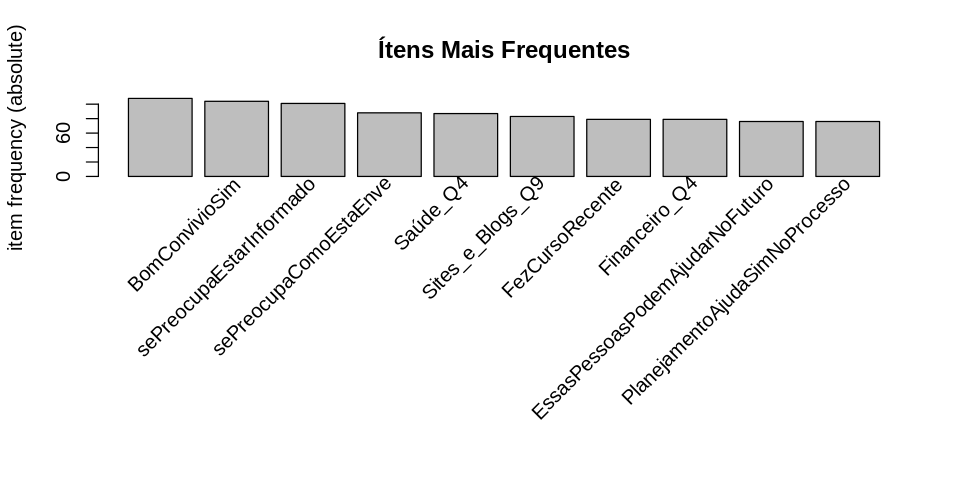

In [11]:
options(repr.plot.width=8, repr.plot.height=4)
itemFrequencyPlot(respostas, topN=10, type="absolute", main="Ítens Mais Frequentes")

In [26]:
# criando regras de associação
rules <- apriori(respostas, parameter = list(supp = 0.3, conf = 0.5)) 
rules_conf <- sort(rules, by="confidence", decreasing=TRUE)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.5    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 32 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[87 item(s), 108 transaction(s)] done [0.00s].
sorting and recoding items ... [24 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 7 8 done [0.00s].
writing ... [21864 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [30]:
# obtendo subset de rules redundantes
subsetRules <- which(colSums(is.subset(rules, rules)) > 2)

# removendo o subset de rules
# redundantes
rules_sub <- rules[-subsetRules]

In [31]:
# Resultado das regras
inspect(rules_sub)

     lhs                        rhs                                 support confidence  coverage      lift count
[1]  {}                      => {planeja_proximos_5anos}          0.5277778  0.5277778 1.0000000 1.0000000    57
[2]  {}                      => {AppMuitoUtil}                    0.5648148  0.5648148 1.0000000 1.0000000    61
[3]  {}                      => {Relacionamentos_Q4}              0.5555556  0.5555556 1.0000000 1.0000000    60
[4]  {}                      => {exames1vezAno}                   0.6296296  0.6296296 1.0000000 1.0000000    68
[5]  {}                      => {Mídias_Sociais_Q9}               0.6296296  0.6296296 1.0000000 1.0000000    68
[6]  {}                      => {App_para_celular_Q25}            0.6481481  0.6481481 1.0000000 1.0000000    70
[7]  {}                      => {possuiInvestimento}              0.6759259  0.6759259 1.0000000 1.0000000    73
[8]  {}                      => {PlanejamentoAjudaSimNoProcesso}  0.7037037  0.7037037 1.0000000